# Stockdata API

In [18]:
import requests
from dotenv import load_dotenv
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"

# print(api_key)

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
data = requests.get(url).json()


Python-dotenv could not parse statement starting at line 1


In [19]:
pd.DataFrame(data["Time Series (Daily)"])

,2021-10-29,2021-10-28,2021-10-27,2021-10-26,2021-10-25,2021-10-22,2021-10-21,2021-10-20,2021-10-19,2021-10-18,...,1999-11-12,1999-11-11,1999-11-10,1999-11-09,1999-11-08,1999-11-05,1999-11-04,1999-11-03,1999-11-02,1999-11-01
1. open,147.2150,149.8200,149.3600,149.3300,148.6800,149.6900,148.8100,148.7000,147.0100,143.4450,...,91.9400,91.5900,88.2500,94.3700,87.7500,84.6200,82.0600,81.6200,78.0000,80.0000
2. high,149.9400,153.1650,149.7300,150.8400,149.3700,150.1800,149.6400,149.7539,149.1700,146.8400,...,92.0000,92.6200,93.2500,94.5000,97.7300,88.3700,85.3700,83.2500,81.6900,80.6900
3. low,146.4128,149.7200,148.4900,149.0101,147.6211,148.6400,147.8700,148.1200,146.5500,143.1600,...,87.3700,89.8700,88.1200,88.0000,86.7500,84.0000,80.6200,81.0000,77.3100,77.3700
4. close,149.8000,152.5700,148.8500,149.3200,148.6400,148.6900,149.4800,149.2600,148.7600,146.5500,...,90.6200,92.2500,91.4400,89.6200,96.3700,88.3100,83.6200,81.5000,80.2500,77.6200
5. volume,124953168,100077888,56094929,60893395,50720556,58883443,61420990,58418788,76378894,85589175,...,2491600,2409600,5159800,7224800,8490400,3721500,3384700,2932700,3564600,2487300


In [20]:
pd.index = pd.to_datetime(df.index)
print(df.index.dtype)


object


In [21]:
df.loc("2021")

ValueError: No axis named 2021 for object type Series

In [ ]:
df.loc["2021-10-20":"2021-10-29"]

NameError: name 'df' is not defined

In [22]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
# NOTE: you can print it for your own validation, but remove the print before pushing to Github

symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    function = "TIME_SERIES_DAILY"

    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&outputsize=full'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)

Python-dotenv could not parse statement starting at line 1


In [23]:
stocks =pd.concat(stock_list, axis =1)
stocks.to_csv("stocks.csv")
stocks

,AAPL,NVDA,TSLA,IBM
2021-10-29,149.80,255.67,1114.00,125.10
2021-10-28,152.57,249.41,1077.04,125.84
2021-10-27,148.85,244.51,1037.86,125.17
2021-10-26,149.32,247.17,1018.43,127.13
2021-10-25,148.64,231.66,1024.86,127.64
...,...,...,...,...
1999-11-05,88.31,28.25,NaN,90.25
1999-11-04,83.62,29.19,NaN,91.56
1999-11-03,81.50,27.44,NaN,94.37
1999-11-02,80.25,25.00,NaN,94.81


(2, 2)


TypeError: 'tuple' object is not callable

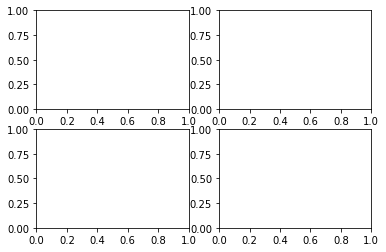

In [24]:
fig, axes = plt.subplots(2, 2)
print(axes.shape)
print(axes.flatten().shape())
stock_names =dict(AAPL="Apple", NVDA="Nivada", TSLA="Tesla", IBM="IBM")
for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data = stocks, x=stocks.index, y=symbol, ax = ax)
    ax.tick_params(axis ='x', rotation =45)
    ax.set(title = f"{stock_names[symbol]}", ylabel="Price in dollars $")
fig.tight_layout()
fig.subtitle("Stocks")
    